# CBE 162 Fall 2024 Lab 8 : PID Controller Dynamics
In this lab, you will study a closed-loop control system with a chemical process, an actuator, and a sensor. You will implement and analyze three types of controllers:
1. **Proportional (P) Controller**
2. **Proportional-Integral (PI) Controller**
3. **Proportional-Integral-Derivative (PID) Controller**

The goal is to understand how each controller type affects the system's response and to quantify the impact using error metrics.

## Problem Statement
You are tasked with designing a feedback control system to regulate the output of a chemical process. The system consists of:
- **Process Transfer Function:** $G(s) = \frac{5}{3s^2 + 4s + 2}$
- **Actuator Transfer Function:** $G_v(s) = \frac{2}{0.5s + 1}$
- **Sensor Transfer Function:** $G_m(s) = \frac{1}{0.2s + 1}$

The closed-loop system should include a controller (P, PI, or PID) that adjusts the system's response to maintain a desired setpoint. The set point and disturbance at t=0 are both 0.

### Feedback Control Loop Diagram
Below is a diagram representing the feedback control system setup.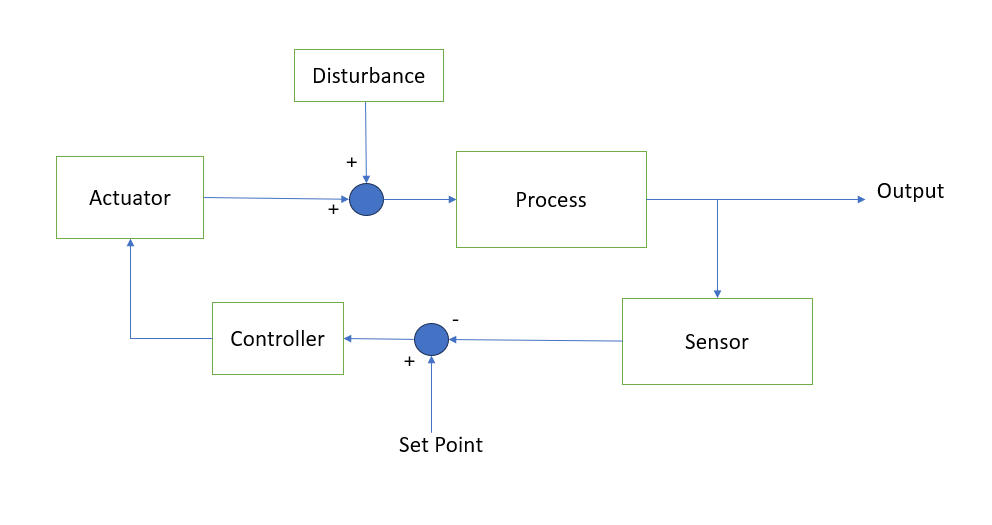

## Error Metric - Integral of Squared Errors (ISE)
To evaluate the performance of the control system, you will calculate the **Integral of Squared Errors (ISE)**:
$$
ISE = \int_0^T e(t)^2 \, dt
$$
Where:
- $e(t)$ is the error at time $t$, defined as the difference between the setpoint and the actual output.
- $T$ is the total simulation time.

The ISE helps quantify how far the system's response deviates from the desired setpoint over time.

## Task 1: Implement a Proportional Controller (P Controller)
**Objective:** Implement a P controller and analyze its effect on the system's response to a unit step change in the disturbance

**Instructions**:
1. Implement a Proportional Controller with $C(s) = K_p$.
2. Simulate the closed-loop response for different values of $K_p ( 0.1, 1, 10)$.
3. Plot and compare the responses for each $K_p$ for a unit change in the disturbance. Simulate until 7 times the controlling time constant.
4. Write as a comment which value of $K_p$ you would select for this system.

Use the `scipy.signal` library to implement the system.

In [1]:
import scipy.signal as sp
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps
import scipy
from scipy import signal

## Task 1.1

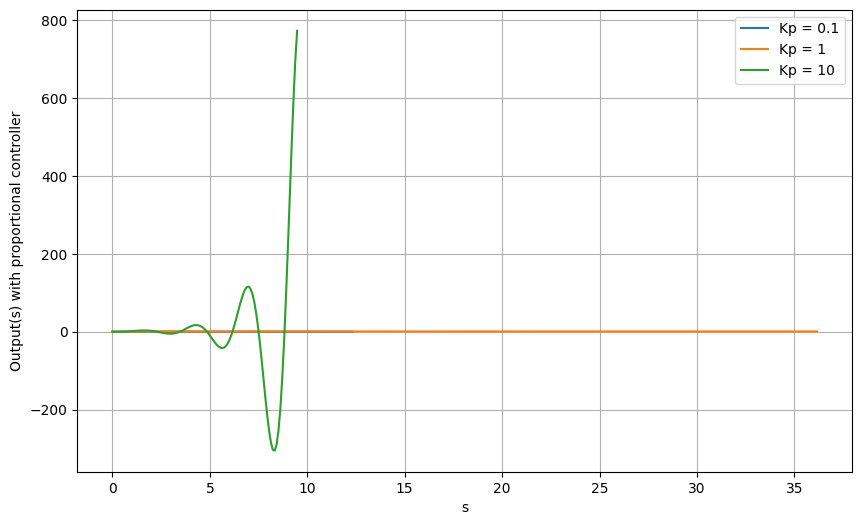

In [3]:
# Task 1: Implement a Proportional Controller (P Controller)
# Your code here to define the P controller and simulate the response.

G_process_num = [5]
G_process_den = [3, 4, 2]

G_actuator_num = [1]
G_actuator_den = [0.5, 1]

G_sensor_num = [1]
G_sensor_den = [0.2, 1]

G_process = sp.TransferFunction(G_process_num, G_process_den)
G_actuator = sp.TransferFunction(G_actuator_num, G_actuator_den)
G_sensor = sp.TransferFunction(G_sensor_num, G_sensor_den)


Kp_values = [0.1, 1, 10]
time_constant = max(0.5, 0.2, 0.75)

plt.figure(figsize=(10,6))

for kp in Kp_values:
    C = sp.TransferFunction([kp], [1])
    L_num = np.polymul(G_process_num, np.polymul(G_actuator_num, G_sensor_num)) * kp
    L_den = np.polymul(G_process_den, np.polymul(G_actuator_den, G_sensor_den))

    closed_loop_num = L_num
    closed_loop_den = np.polyadd(L_den, L_num)

    T = sp.TransferFunction(closed_loop_num, closed_loop_den)

    t, y = sp.step(T)
    plt.plot(t, y, label=f"Kp = {kp}")

plt.xlabel("s")
plt.ylabel("Output(s) with proportional controller")
plt.legend()
plt.grid()


## Task 1.2, 1.3

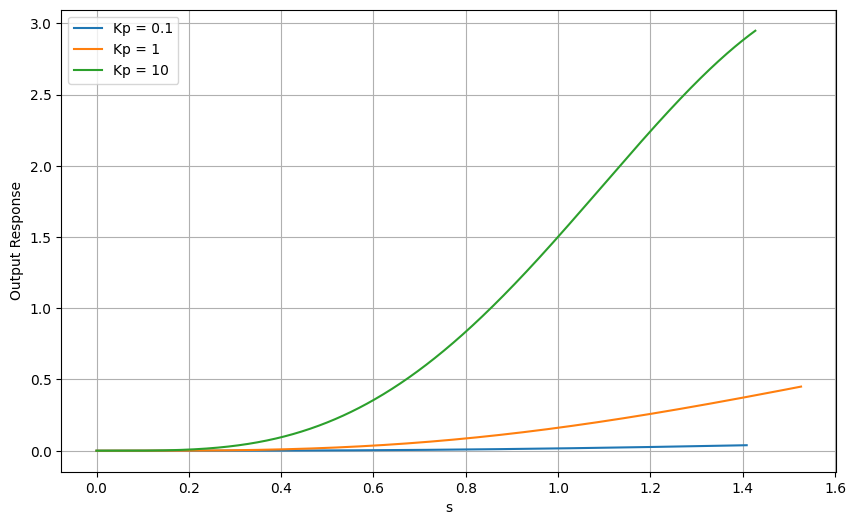

In [4]:
Kp_values = [0.1, 1, 10]

plt.figure(figsize=(10, 6))

for Kp in Kp_values:
    C_num = [Kp]
    C_den = [1]

    L_num = np.polymul(np.polymul(np.polymul(G_process_num, G_actuator_num), G_sensor_num), C_num)
    L_den = np.polymul(np.polymul(np.polymul(G_process_den, G_actuator_den), G_sensor_den), C_den)

    closed_loop_num = L_num
    closed_loop_den = np.polyadd(L_den, L_num)

    T = sp.TransferFunction(closed_loop_num, closed_loop_den)

    poles = np.roots(closed_loop_den)
    slowest_pole = np.min(np.real(poles[poles < 0]))
    tau = -1 / slowest_pole if slowest_pole != 0 else 1

    t_end = 7 * tau
    t = np.linspace(0, t_end, 1000)
    t, y = sp.step(T, T=t)
    plt.plot(t, y, label=f"Kp = {Kp}")

plt.xlabel("s")
plt.ylabel("Output Response")
plt.legend()
plt.grid()
plt.show()


## Task 1.4

#### I would select a Kp value of 1 because it seems to have the least oscillatory behavior and linear response with the unit step input

## Task 2: Implement a Proportional-Integral Controller (PI Controller)
**Objective:** Implement a PI controller and analyze its effect on the system's response to a unit step change in the disturbance

**Instructions**:
1. Implement a PI Controller with $C(s) = K_p + \frac{K_i}{s}$.
2. Simulate the closed-loop response for different values of $K_p$ and $K_i$ (e.g., $K_p = 3$, $K_i = 0.1, 1.0, 10$).
3. Plot and compare the responses for each combination for a unit change in the disturbance. Simulate until 7 times the controlling time constant.
4. Write as a comment which value of $K_i$ you would select for this system.


## Task 2.1

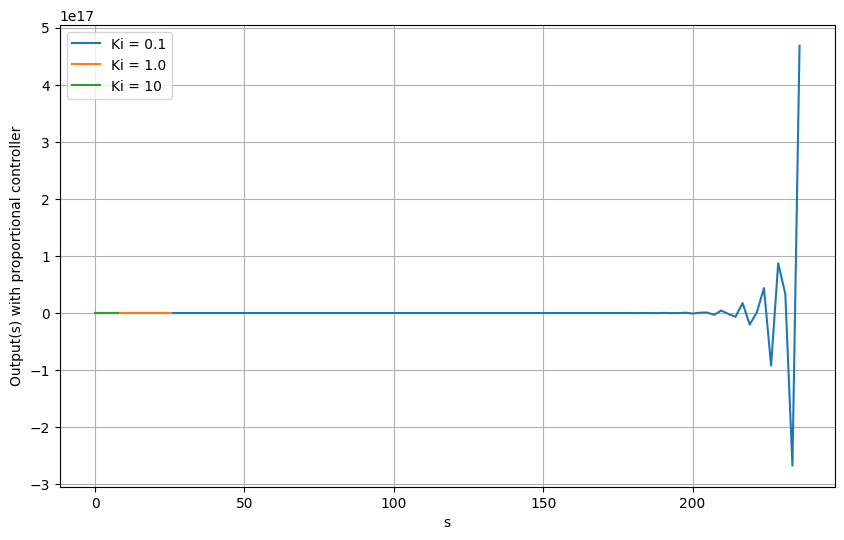

In [5]:
# Task 2: Implement a Proportional-Integral Controller (PI Controller)
# Your code here to define the PI controller and simulate the response.

Kp = 3
Ki_values = [0.1, 1.0, 10]

plt.figure(figsize=(10,6))

for ki in Ki_values:
    C_num = [Kp, ki]
    C_den = [1, 0]

    L_num = np.polymul(np.polymul(np.polymul(G_process_num, G_actuator_num), G_sensor_num), C_num)
    L_den = np.polymul(np.polymul(np.polymul(G_process_den, G_actuator_den), G_sensor_den), C_den)

    closed_loop_num = L_num
    closed_loop_den = np.polyadd(L_den, L_num)

    T = sp.TransferFunction(closed_loop_num, closed_loop_den)

    t, y = sp.step(T)
    plt.plot(t, y, label=f"Ki = {ki}")

plt.xlabel("s")
plt.ylabel("Output(s) with proportional controller")
plt.legend()
plt.grid()


## Task 2.2, 2.3

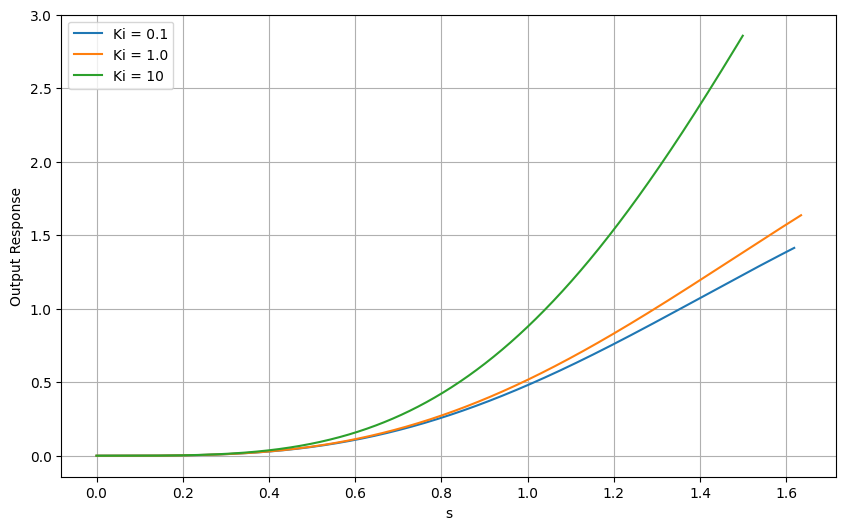

In [6]:
plt.figure(figsize=(10, 6))

for Ki in Ki_values:
    C_num = [Kp, Ki]
    C_den = [1, 0]

    L_num = np.polymul(np.polymul(np.polymul(G_process_num, G_actuator_num), G_sensor_num), C_num)
    L_den = np.polymul(np.polymul(np.polymul(G_process_den, G_actuator_den), G_sensor_den), C_den)

    closed_loop_num = L_num
    closed_loop_den = np.polyadd(L_den, L_num)

    T = sp.TransferFunction(closed_loop_num, closed_loop_den)

    poles = np.roots(closed_loop_den)
    slowest_pole = np.min(np.real(poles[poles < 0]))
    tau = -1 / slowest_pole if slowest_pole != 0 else 1 

    t_end = 7 * tau
    t = np.linspace(0, t_end, 1000)
    t, y = sp.step(T, T=t)
    plt.plot(t, y, label=f"Ki = {Ki}")

plt.xlabel("s")
plt.ylabel("Output Response")
plt.legend()
plt.grid()
plt.show()


## Task 1.4

#### I would select Ki = 0.1 here because it has the least oscillatory behavior and has the most linear relationship with the unit step

## Task 3: Implement a Proportional-Integral-Derivative Controller (PID Controller)
**Objective:** Implement a PID controller and analyze its effect on the system's response to a unit step change in the disturbance

**Instructions**:
1. Implement a PID Controller with $C(s) = K_p + \frac{K_i}{s} + K_d s$.
2. Simulate the closed-loop response for different values of $K_p$, $K_i$, and $K_d$ (e.g., $K_p = 3$, $K_i = 2.25$, $K_d = 0.1,1,5$).
3. Plot and compare the responses for each combination for a unit change in the disturbance. Simulate until 7 times the controlling time constant.
4. Write as a comment which value of $K_d$ you would select for this system.


## Task 1.1

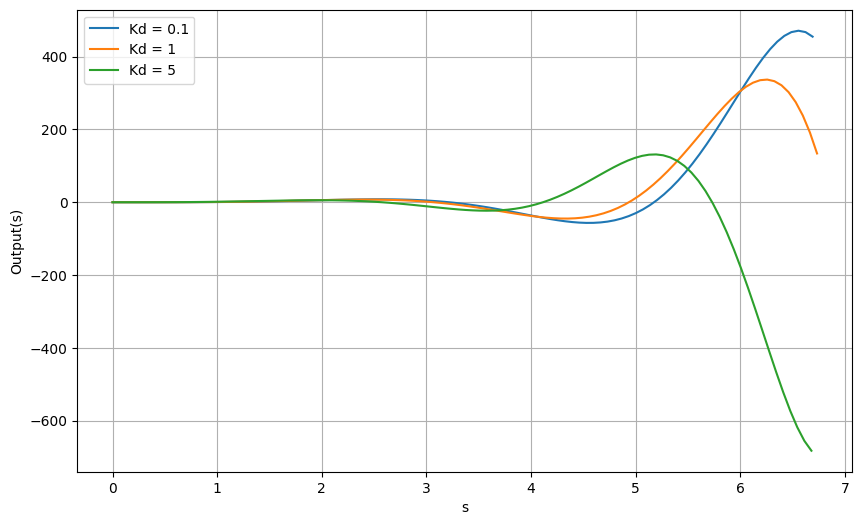

In [7]:
# Task 3: Implement a Proportional-Integral-Derivative Controller (PID Controller)
# Your code here to define the PID controller and simulate the response.

Kd_values = [0.1, 1, 5]
Kp = 3
Ki_values = 2.25

plt.figure(figsize=(10,6))

for kd in Kd_values:
    C_num = [kd, Kp + ki]
    C_den = [1, 0]

    L_num = np.polymul(np.polymul(np.polymul(G_process_num, G_actuator_num), G_sensor_num), C_num)
    L_den = np.polymul(np.polymul(np.polymul(G_process_den, G_actuator_den), G_sensor_den), C_den)

    closed_loop_num = L_num
    closed_loop_den = np.polyadd(L_den, L_num)

    T = sp.TransferFunction(closed_loop_num, closed_loop_den)

    t, y = sp.step(T)
    plt.plot(t, y, label=f"Kd = {kd}")

plt.xlabel("s")
plt.ylabel("Output(s)")
plt.legend()
plt.grid()



## Task 1.1, 1.2

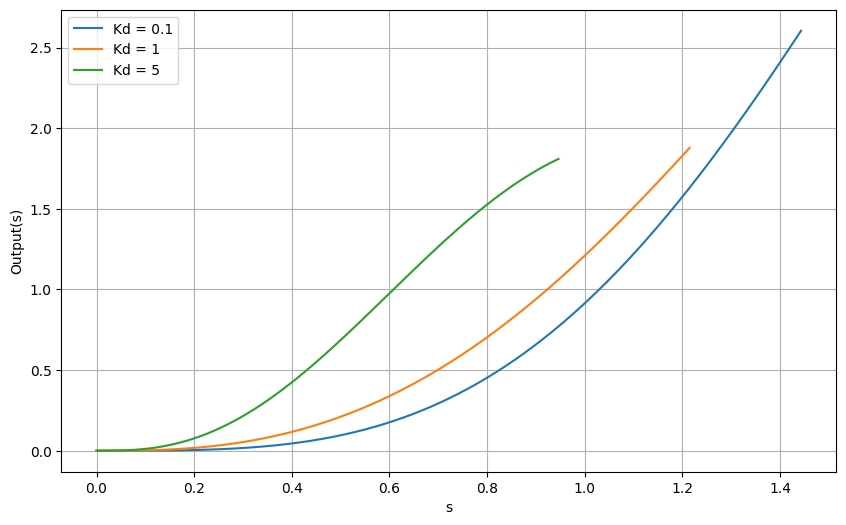

In [8]:
plt.figure(figsize=(10,6))

for Kd in Kd_values:

    C_num = [Kd, Kp, Ki]
    C_den = [1, 0]

    L_num = np.polymul(np.polymul(np.polymul(G_process_num, G_actuator_num), G_sensor_num), C_num)
    L_den = np.polymul(np.polymul(np.polymul(G_process_den, G_actuator_den), G_sensor_den), C_den)

    closed_loop_num = L_num
    closed_loop_den = np.polyadd(L_den, L_num)

    T = sp.TransferFunction(closed_loop_num, closed_loop_den)

    poles = np.roots(closed_loop_den)
    slowest_pole = np.min(np.real(poles[poles < 0]))
    tau = -1 / slowest_pole if slowest_pole != 0 else 1

    t_end = 7 * tau
    t = np.linspace(0, t_end, 1000)
    t, y = sp.step(T, T=t)
    plt.plot(t, y, label=f"Kd = {Kd}")


plt.xlabel("s")
plt.ylabel("Output(s)")
plt.legend()
plt.grid()



## Task 1.4

#### I would select Kd = 1 here because it has the least oscillatory behavior and has the most linear relationship with the unit step

## Task 4: Quantify the Error
**Objective:** Calculate and compare the error using the Integral of Squared Errors (ISE) for one set of P, PI, and PID controllers, to a unit step change in the disturbance.

**Instructions**:
1. Simulate the response for a P controller($K_p=2.5$), PI controller($K_p=2.25, K_i=1$) and a PID controller( $K_p=3, K_i=2.25, K_d=1)$ for a unit change in the disturbance. Simulate until 7 times the controlling time constant.

2. Calculate the ISE for each controller type using the formula:
$$
ISE = \int_0^T e(t)^2 \, dt
$$
3. Analyze which controller performs best in terms of error minimization.
4. Write as a comment which controller you would select for this system.
5. Consider a case wherein there is a unit step change in the disturbance at t=0, followed by a  unit step change in set point after $5\tau$ time, where $\tau$ is the controlling time constant for the process. Simulate the response of each controller from part (1) of this task for such a case, until t=10$\tau$. (Make only 1 plot for each controller)


## Task 4.1, 4.2, 4.5

In [11]:
G_process_num = [5]
G_process_den = [3, 4, 2]
G_actuator_num = [2]
G_actuator_den = [0.5, 1]
G_sensor_num = [1]
G_sensor_den = [0.2, 1]


controlling_tau = 7
t_end_disturbance = 7 * controlling_tau
t_end_setpoint = 10 * controlling_tau
t_disturbance = np.linspace(0, t_end_disturbance, 1000)
t_setpoint_shifted = np.linspace(0, t_end_setpoint, 1000)


controllers = {
    "P": {"Kp": 2.5, "Ki": 0, "Kd": 0},
    "PI": {"Kp": 2.25, "Ki": 1, "Kd": 0},
    "PID": {"Kp": 3, "Ki": 2.25, "Kd": 1},
}

def create_controller_tf(Kp, Ki, Kd):
    if Ki == 0 and Kd == 0:
        return [Kp], [1]
    elif Kd == 0:
        return [Kp, Ki], [1, 0]
    else:
        return [Kd, Kp, Ki], [1, 0]

/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_6797/89605772.py:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  ISE_disturbance = simps(error_disturbance**2, t)


ISE Values:
P Controller ISE: 6630344139736215.0
PI Controller ISE: 1.1804125843743344e+20
PID Controller ISE: 42697340083158.766


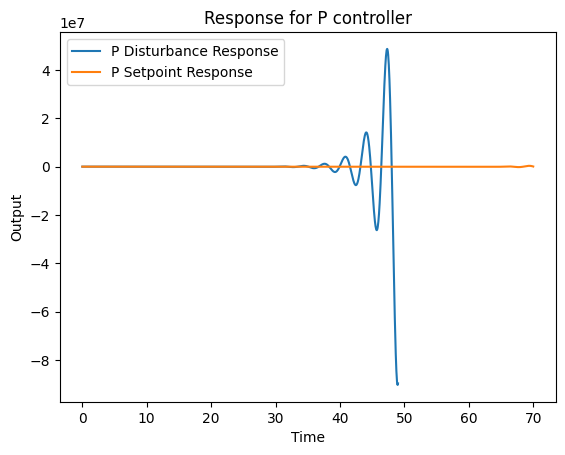

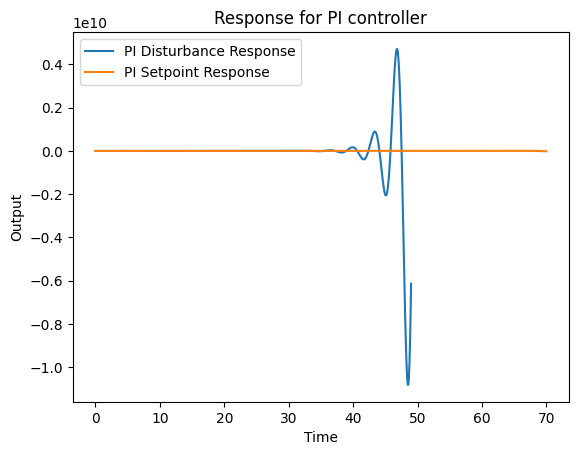

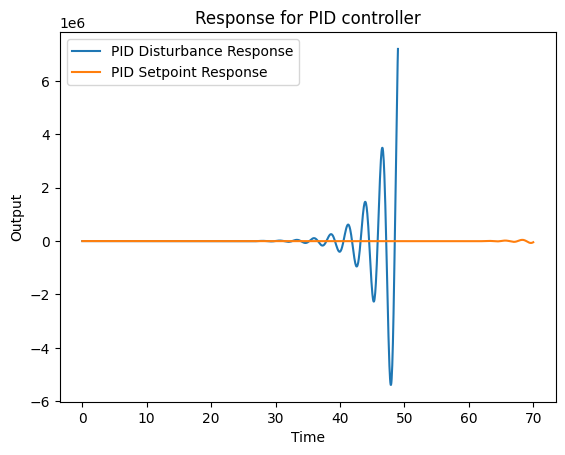

In [12]:
ISE_values = {}

for controller_type, gains in controllers.items():
    Kp = gains["Kp"]
    Ki = gains["Ki"]
    Kd = gains["Kd"]

    C_num, C_den = create_controller_tf(Kp, Ki, Kd)

    L_num = np.polymul(np.polymul(np.polymul(G_process_num, G_actuator_num), G_sensor_num), C_num)
    L_den = np.polymul(np.polymul(np.polymul(G_process_den, G_actuator_den), G_sensor_den), C_den)

    closed_loop_num = L_num
    closed_loop_den = np.polyadd(L_den, L_num)
    T_disturbance = sp.TransferFunction(closed_loop_num, closed_loop_den)

    t, y_disturbance = sp.step(T_disturbance, T=t_disturbance)
    error_disturbance = 1 - y_disturbance

    ISE_disturbance = simps(error_disturbance**2, t)
    ISE_values[controller_type] = ISE_disturbance

    plt.figure()
    plt.plot(t, y_disturbance, label=f"{controller_type} Disturbance Response")
    plt.xlabel("Time")
    plt.ylabel("Output")
    plt.legend()
    plt.grid()

    u_setpoint = np.ones_like(t_setpoint_shifted)
    u_setpoint[t_setpoint_shifted < 5 * controlling_tau] = 0 

    _, y_setpoint, _ = sp.lsim(T_disturbance, u_setpoint, t_setpoint_shifted)

    plt.plot(t_setpoint_shifted, y_setpoint, label=f"{controller_type} Setpoint Response")
    plt.xlabel("Time")
    plt.ylabel("Output")
    plt.legend()
    plt.grid()
    plt.title(f"Response for {controller_type} controller")

# Display ISE results
print("ISE Values:")
for controller_type, ISE_value in ISE_values.items():
    print(f"{controller_type} Controller ISE: {ISE_value}")


## Task 4.3, 4.4

#### The PID controller minimizes the error and has limited oscillations so I would select that one